# **Dependencies Loading**

In [ ]:
!pip install opendatasets
!pip install pyradiomics
import opendatasets as od

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 13.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Discarding https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz (from https://pypi.org/simple/pyradiomics/): Requested pyradiomics from https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz has inconsistent version: expected '3.1.0', but metadata has '3.0.1a1'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.

In [55]:
!pip install SimpleITK

In [56]:
# importing dependencies
import os
import pandas as pd
import numpy as np
import SimpleITK as sitk
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.feature_selection import RFECV

# **Classical Features Extraction**

In [ ]:
# classical features extraction using PyRadiomics packages
def extracting_classical_features(master_dir_path):
  df = pd.DataFrame()
  img_lablel_list = []
  c = 0
  dir_c = 0

  for dir in os.listdir(master_dir_path):
    for file in os.listdir(os.path.join(f"{master_dir_path}//{dir}")):
      df_img = pd.DataFrame()
      if file.endswith(".jpg"):
        img_path = os.path.join(f"{master_dir_path}//{dir}//{file}")
        img = sitk.ReadImage(img_path)

        # firstorder features extraction module
        from radiomics.firstorder import RadiomicsFirstOrder
        _1stOrder = RadiomicsFirstOrder(img, img)
        _1stOrder.enableAllFeatures()
        computed_features1 = _1stOrder.execute()
        for key, value in computed_features1.items():
          df_img[f"{key}"] = pd.Series(value)

        # shape2D features extraction module
        from radiomics.shape2D import RadiomicsShape2D
        shape2d = RadiomicsShape2D(img, img)
        shape2d.enableAllFeatures()
        computed_features2 = shape2d.execute()
        for key, value in computed_features2.items():
          df_img[f"{key}"] = pd.Series(value)

        # glcm features extraction module
        from radiomics.glcm import RadiomicsGLCM
        RadiomicsGLCM = RadiomicsGLCM(img, img)
        RadiomicsGLCM.enableAllFeatures()  # Enables all first-order features
        computed_features3 = RadiomicsGLCM.execute()
        for key, value in computed_features3.items():
          df_img[f"{key}"] = pd.Series(value)

        # glrlm features extraction module
        from radiomics.glrlm import RadiomicsGLRLM
        RadiomicsGLRLM = RadiomicsGLRLM(img, img)
        RadiomicsGLRLM.enableAllFeatures()
        computed_features4 = RadiomicsGLRLM.execute()
        for key, value in computed_features4.items():
          df_img[f"{key}"] = pd.Series(value)

        # ngtdm features extraction module
        from radiomics.ngtdm import RadiomicsNGTDM
        RadiomicsNGTDM = RadiomicsNGTDM(img, img)
        RadiomicsNGTDM.enableAllFeatures()
        computed_features5 = RadiomicsNGTDM.execute()
        for key, value in computed_features5.items():
          df_img[f"{key}"] = pd.Series(value)

        # gldm features extraction module
        from radiomics.gldm import RadiomicsGLDM
        RadiomicsGLDM = RadiomicsGLDM(img, img)
        RadiomicsGLDM.enableAllFeatures()
        computed_features6 = RadiomicsGLDM.execute()
        for key, value in computed_features6.items():
          df_img[f"{key}"] = pd.Series(value)

        # glszm features extraction module
        from radiomics.glszm import RadiomicsGLSZM
        RadiomicsGLSZM = RadiomicsGLSZM(img, img)
        RadiomicsGLSZM.enableAllFeatures()
        computed_features7 = RadiomicsGLSZM.execute()
        for key, value in computed_features7.items():
          df_img[f"{key}"] = pd.Series(value)

        # image label extraction module
        img_label = file.split(".")[0].split(" ")[0]
        img_lablel_list.append(img_label)
        print(f"image #{c}")
        c+=1

        # concatenating dataframes
        df = pd.concat([df, df_img])


  # image labeling
  df["img_label"] = img_lablel_list

  # dropping unneeded column
  df = df.drop(["Unnamed: 0"], axis=1)
  # csv file saving
  df.to_csv("full_extracted.csv")
  return df

# **Data Preprocessing**

In [ ]:
def data_preprocessing(df):
  pre_scaled = df.iloc[:, :-1].applymap(pd.to_numeric)
  columns_titles = pre_scaled.columns
  scaler = StandardScaler().fit_transform(pre_scaled)
  scaled_data = pd.DataFrame(scaler)
  scaled_data.columns = columns_titles

  label_encoder = LabelEncoder()
  scaled_data['labels']= label_encoder.fit_transform(df.iloc[:,-1])

  return scaled_data

In [ ]:
def pearson_correlation_heatmap(df):
  dataplot = sns.heatmap(df.iloc[:,:-1].corr(numeric_only=True), cmap="YlGnBu", annot=False)
  plt.show()

In [ ]:
def removing_highly_corr_features(df, show_highly_corr=False, show_curr_corr=False):
  corr_matrix = df.corr().abs()
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

  to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
  processed_df = df.drop(to_drop, axis=1)
  if show_highly_corr == True:
    print("\nThe correlation matrix of the highly correlated features")
    pearson_correlation_heatmap(pd.concat([df[to_drop], df.iloc[:,-1]], axis=1))

  if show_curr_corr == True:
    print("\nThe correlation matrix of the current features")
    pearson_correlation_heatmap(processed_df)

  print(f"# of dropped feaures: {len(to_drop)}")
  print(f"Dropped features are: {to_drop}")
  print(f"# of remained features {processed_df.shape[1]}")
  print(f"Remained features are: {processed_df.columns}")
  return processed_df

In [ ]:
def recursive_feature_elimination(df):
  X = df.iloc[:, :-1]
  y = df.iloc[:, -1]
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  rf = RandomForestClassifier(random_state=42, max_depth=6, min_samples_leaf=1, min_samples_split=5)
  rfecv = RFECV(rf, step=1, cv=5, scoring="accuracy")
  rfecv.fit(x_train, y_train)
  print("Optimal number of features:", rfecv.n_features_)
  print("Selected features (True means selected):", rfecv.support_)
  print("Feature ranking (1 means selected):", rfecv.ranking_)
  selected_features = X.columns[rfecv.support_]
  x_rfecv = x_train[selected_features]
  rf.fit(x_rfecv, y_train)
  y_pred = rf.predict(x_test[selected_features])
  accuracy = accuracy_score(y_test, y_pred)
  print("Model accuracy with selected features:", accuracy)
  return pd.concat([df[selected_features], df.iloc[:,-1]], axis=1)

# **Hyperparameters Tuning**

In [ ]:
# grid search algorithm
def grid_search(df):
  X = df.iloc[:, :-1]
  y = df.iloc[:, -1]
  X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

  # initializing ML estimators
  lr = LogisticRegression(random_state=42)
  dt = DecisionTreeClassifier(random_state=42)
  rf = RandomForestClassifier(random_state=42)
  knn = KNeighborsClassifier()
  svm = SVC(random_state=42)

  # initializing the pool of searchable hyperparamters
  param_range = [1, 2, 3, 4, 5, 6]
  param_range_fl = [1.0, 0.5, 0.1]
  lr_param_grid = [{'penalty': ['l1', 'l2'],
                    'C': param_range_fl,
                    'solver': ['liblinear']}]
  dt_param_grid = [{'criterion': ['gini', 'entropy'],
                    'min_samples_leaf': param_range,
                    'max_depth': param_range,
                    'min_samples_split': param_range[1:]}]
  rf_param_grid = [{'min_samples_leaf': param_range,
                    'max_depth': param_range,
                    'min_samples_split': param_range[1:]}]
  knn_param_grid = [{'n_neighbors': param_range,
                    'weights': ['uniform', 'distance'],
                    'metric': ['euclidean', 'manhattan']}]
  svm_param_grid = [{'kernel': ['linear', 'rbf'],
                      'C': param_range}]

  scoring_metrics = ['f1_samples', 'precision_samples', 'accuracy']

  # grid search function initiation for all estimators
  lr_grid_search = GridSearchCV(estimator=lr,
          param_grid=lr_param_grid,
          scoring='accuracy',
          cv=10)
  dt_grid_search = GridSearchCV(estimator=dt,
          param_grid=dt_param_grid,
          scoring='accuracy',
          cv=10)
  rf_grid_search = GridSearchCV(estimator=rf,
          param_grid=rf_param_grid,
          scoring='accuracy',
          cv=10)
  knn_grid_search = GridSearchCV(estimator=knn,
          param_grid=knn_param_grid,
          scoring='accuracy',
          cv=10)
  svm_grid_search = GridSearchCV(estimator=svm,
          param_grid=svm_param_grid,
          scoring='accuracy',
          cv=10)

  # applying grid search on the mentioned ML estimators
  grids = [lr_grid_search, dt_grid_search, rf_grid_search, knn_grid_search, svm_grid_search]
  for pipe in grids:
      pipe.fit(X_train,y_train)


  grid_dict = {0: 'Logistic Regression', 1: 'Decision Trees',
              2: 'Random Forest', 3: 'K-Nearest Neighbors',
              4: 'Support Vector Machines'}

  # displaying key points about the grid search
  for i, model in enumerate(grids):
      print("======================================================================")
      print('{} Test Accuracy: {}'.format(grid_dict[i], model.score(X_test,y_test)))
      print('{} Best Params: {}'.format(grid_dict[i], model.best_params_))
      print('{} Best Estimator: {}'.format(grid_dict[i], model.best_estimator_))
      print("======================================================================")
  return 1
  # note: parts of this code is manipulated from Medium

In [ ]:
# training & evaluating different models
def estimators_training_evaluation(df):
  # splitting the dataset into training and testing Xs and ys
  X = df.iloc[:, :-1]
  y = df.iloc[:, -1]
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  # calling the classifiers constructor code
  lr = LogisticRegression(random_state=42, C= 0.1, penalty='l2', solver='liblinear')
  dt = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=6, min_samples_leaf=1, min_samples_split=2)
  rf = RandomForestClassifier(random_state=42, max_depth=6, min_samples_leaf=1, min_samples_split=5)
  knn = KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')
  svm = SVC(random_state=42, C=6, kernel='rbf')

  estimators = [lr, dt, rf, knn, svm]
  scoring_metric = ['accuracy', 'precision_macro', 'f1_macro']

  # lists to store the metrics values
  accuracy_scores_val = []
  precision_macro_scores_val = []
  f1_macro_scores_val = []
  accuracy_scores_test = []
  precision_macro_scores_test = []
  f1_macro_scores_test = []

  # Calculating Validation Metrics
  print("## Validation Metrics ##")
  for est in estimators:
    print(f"\n{str(est).split('(')[0]}")
    for metric in scoring_metric:
      scores = cross_val_score(est, x_train, y_train, scoring=metric, cv=10)
      metric_score = np.mean(scores)
      print(f"\t\t>> {metric}: {metric_score*100 :.4f}%")

      if metric == "accuracy":
        accuracy_scores_val.append(metric_score*100)
      elif metric == "precision_macro":
        precision_macro_scores_val.append(metric_score*100)
      elif metric == "f1_macro":
        f1_macro_scores_val.append(metric_score*100)

  # Calculating Testing Metrics
  print("\n\n## Testing Metrics ##")
  for est in estimators:
    est.fit(x_train, y_train)
    print(f"\n{str(est).split('(')[0]}")
    y_pred = est.predict(x_test)

    accuracy_metric = accuracy_score(y_test, y_pred)
    accuracy_scores_test.append(accuracy_metric*100)
    print(f"\t\t>> accuracy metric: {accuracy_metric*100 :.4f}%")

    precisio_metric = precision_score(y_test, y_pred, average = "macro")
    precision_macro_scores_test.append(precisio_metric*100)
    print(f"\t\t>> precisio metric: {precisio_metric*100 :.4f}%")

    f1_metric = f1_score(y_test, y_pred, average = "macro")
    f1_macro_scores_test.append(f1_metric*100)
    print(f"\t\t>> f1 metric: {f1_metric*100 :.4f}%")

  return accuracy_scores_val, precision_macro_scores_val, f1_macro_scores_val, accuracy_scores_test, precision_macro_scores_test, f1_macro_scores_test

In [ ]:
# plotting & saving metric scores figure as png file [DONE]
def estimators_performance_plot(accuracy_scores, precision_macro_scores, f1_macro_scores, save_fig=False):
  estimator = ['lr', 'dt', 'rf', 'knn', 'svm']
  scores = {
      'accuracy scores': accuracy_scores,
      'Precision Scores': precision_macro_scores,
      'F1 Scores': f1_macro_scores}

  x = np.arange(len(estimator))  # the label locations
  width = 0.3  # the width of the bars
  multiplier = 0

  fig, ax = plt.subplots(layout='constrained')
  for attribute, measurement in scores.items():
      offset = width * multiplier
      rects = ax.bar(x + offset, measurement, width, label=attribute)
      ax.bar_label(rects, padding=3, fmt='%.1f')
      multiplier += 1

  ax.set_ylabel("Score")
  ax.set_xlabel("Estimator")
  ax.set_title("Estimator Vs. Metrics Scores")
  ax.set_xticks(x + width, estimator)
  ax.legend(loc='upper center', ncols=3)
  ax.set_ylim(0, 119)
  plt.show()
  if save_fig == True:
    plt.savefig("estimators_performance.png")

In [ ]:
# extracting classical features from the images in the traing set directory
master_dir = '/content/best-alzheimer-mri-dataset-99-accuracy/Combined Dataset/train'
features_df = extracting_classical_features(master_dir)

In [ ]:
# reading the file of the full extracted features
features_df = pd.read_csv("/content/full_extracted.csv")

In [ ]:
# preprocessing the df by normalization and label encoding
processed_df = data_preprocessing(features_df)

<ipython-input-27-f19542a7b552>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pre_scaled = df.iloc[:, :-1].applymap(pd.to_numeric)


In [ ]:
# displaying the df data
processed_df

,Unnamed: 0,10Percentile,90Percentile,Energy,Entropy,InterquartileRange,Kurtosis,Maximum,MeanAbsoluteDeviation,Mean,...,LowGrayLevelZoneEmphasis,SizeZoneNonUniformity,SizeZoneNonUniformityNormalized,SmallAreaEmphasis,SmallAreaHighGrayLevelEmphasis,SmallAreaLowGrayLevelEmphasis,ZoneEntropy,ZonePercentage,ZoneVariance,labels
0,0.0,0.0,0.0,-0.553584,9.860761e-32,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.423501,-1.329547,-1.292538,-1.292538,-1.292538,1.486637,0.256309,-0.531286,2
1,0.0,0.0,0.0,-0.562702,9.860761e-32,0.0,0.0,0.0,0.0,0.0,...,0.0,0.246978,-0.413982,-0.496471,-0.496471,-0.496471,0.388714,0.506924,-0.531290,2
2,0.0,0.0,0.0,-0.547638,9.860761e-32,0.0,0.0,0.0,0.0,0.0,...,0.0,0.666399,0.261947,0.428275,0.428275,0.428275,0.310521,0.329324,-0.531271,2
3,0.0,0.0,0.0,-0.542088,9.860761e-32,0.0,0.0,0.0,0.0,0.0,...,0.0,0.431655,-0.785628,-0.812108,-0.812108,-0.812108,0.632993,0.478929,-0.531290,2
4,0.0,0.0,0.0,-0.572217,9.860761e-32,0.0,0.0,0.0,0.0,0.0,...,0.0,1.550013,0.949260,1.075723,1.075723,1.075723,-0.793063,0.979956,-0.531304,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,0.0,0.0,0.0,-0.545259,9.860761e-32,0.0,0.0,0.0,0.0,0.0,...,0.0,0.588379,-0.699462,-0.611493,-0.611493,-0.611493,0.562097,0.585699,-0.531299,1
10236,0.0,0.0,0.0,-0.552395,9.860761e-32,0.0,0.0,0.0,0.0,0.0,...,0.0,0.807123,-0.421722,-0.413242,-0.413242,-0.413242,0.141622,0.715505,-0.531301,1
10237,0.0,0.0,0.0,-0.565081,9.860761e-32,0.0,0.0,0.0,0.0,0.0,...,0.0,0.102090,-0.677714,-0.626287,-0.626287,-0.626287,0.599182,0.542766,-0.531297,1
10238,0.0,0.0,0.0,-0.557152,9.860761e-32,0.0,0.0,0.0,0.0,0.0,...,0.0,0.668949,-0.179148,-0.021613,-0.021613,-0.021613,0.234982,0.608593,-0.531296,1


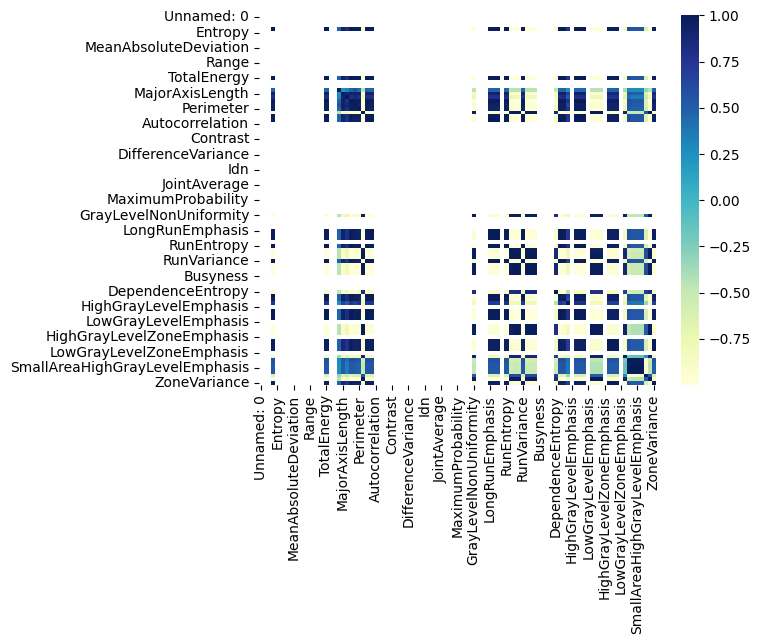

In [ ]:
# displaying pearson correlation heatmap of the full set of features
pearson_correlation_heatmap(processed_df)


The correlation matrix of the highly correlated features


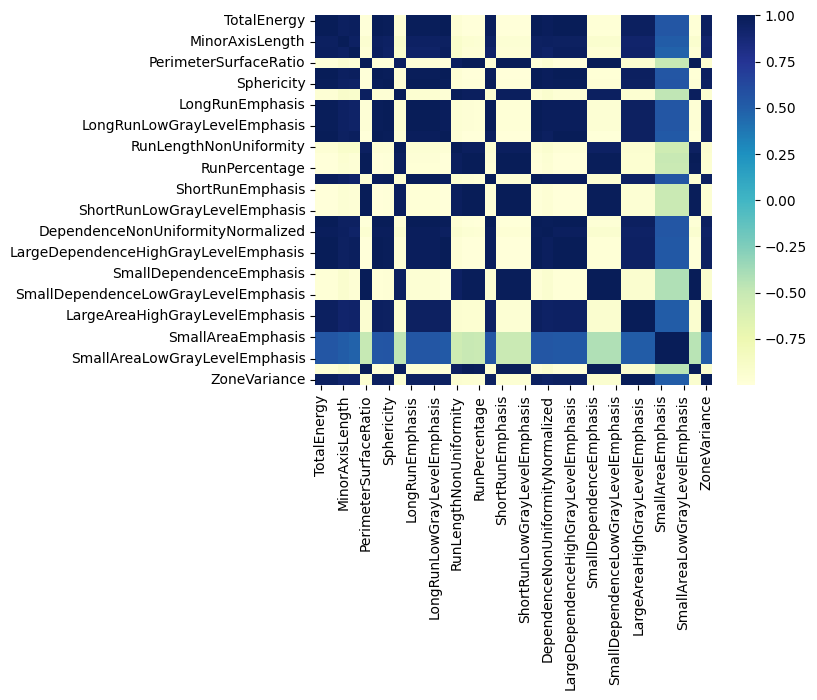


The correlation matrix of the current features


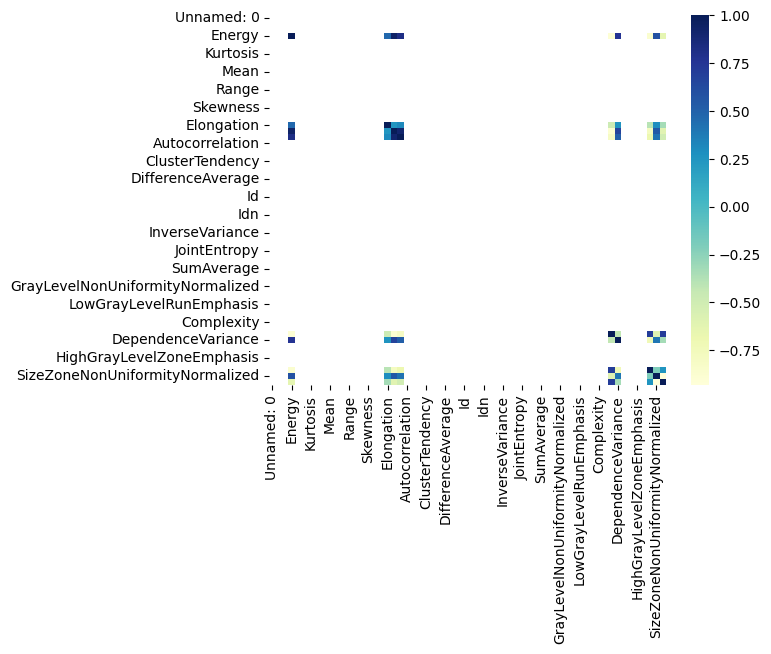

# of dropped feaures: 35
Dropped features are: ['TotalEnergy', 'MeshSurface', 'MinorAxisLength', 'Perimeter', 'PerimeterSurfaceRatio', 'PixelSurface', 'Sphericity', 'GrayLevelNonUniformity', 'LongRunEmphasis', 'LongRunHighGrayLevelEmphasis', 'LongRunLowGrayLevelEmphasis', 'RunEntropy', 'RunLengthNonUniformity', 'RunLengthNonUniformityNormalized', 'RunPercentage', 'RunVariance', 'ShortRunEmphasis', 'ShortRunHighGrayLevelEmphasis', 'ShortRunLowGrayLevelEmphasis', 'DependenceNonUniformity', 'DependenceNonUniformityNormalized', 'LargeDependenceEmphasis', 'LargeDependenceHighGrayLevelEmphasis', 'LargeDependenceLowGrayLevelEmphasis', 'SmallDependenceEmphasis', 'SmallDependenceHighGrayLevelEmphasis', 'SmallDependenceLowGrayLevelEmphasis', 'LargeAreaEmphasis', 'LargeAreaHighGrayLevelEmphasis', 'LargeAreaLowGrayLevelEmphasis', 'SmallAreaEmphasis', 'SmallAreaHighGrayLevelEmphasis', 'SmallAreaLowGrayLevelEmphasis', 'ZonePercentage', 'ZoneVariance']
# of remained features 63
Remained features are:

In [ ]:
# removing the highly correlated features: threshold of 0.95
processed_df2 = removing_highly_corr_features(processed_df, show_highly_corr=True, show_curr_corr=True)

In [ ]:
# applying RFE algorithm
processed_df3 = recursive_feature_elimination(processed_df2)

Optimal number of features: 7
Selected features (True means selected): [False False False  True False False False False False False False False
 False False False False False False  True  True  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True  True False False False False  True
 False False]
Feature ranking (1 means selected): [56 55 54  1 16 14 12 10  9  8  7 18 20 23 24 22 26 27  1  1  1 32 34 36
 38 40 42 44 46 48 50 52 53 51 49 47 45 43 41 39 37 35 33 31 21 19 17 15
 13 11  6  5  4  1  1 25 28 29 30  1  3  2]
Model accuracy with selected features: 0.69921875


In [ ]:
# displaying the df data after removing the non-optimal features
processed_df3

,Energy,Elongation,MajorAxisLength,MaximumDiameter,DependenceEntropy,DependenceVariance,SizeZoneNonUniformity,labels
0,-0.553584,0.045693,-0.619030,-0.905397,0.675452,-0.202755,-0.423501,2
1,-0.562702,-0.226979,-0.502668,-0.806829,0.740067,-0.132360,0.246978,2
2,-0.547638,-1.026394,-0.921730,-0.971745,1.526856,1.131517,0.666399,2
3,-0.542088,-0.300674,-0.530713,-0.839140,0.583770,-0.299477,0.431655,2
4,-0.572217,0.067403,-0.553118,-0.711511,0.105203,-0.900508,1.550013,2
...,...,...,...,...,...,...,...,...
10235,-0.545259,-0.260156,-0.100753,0.469507,0.472398,-0.625129,0.588379,1
10236,-0.552395,0.742588,-0.376349,0.288494,0.248854,-0.827493,0.807123,1
10237,-0.565081,-1.356651,0.034108,0.295625,0.116472,-1.015299,0.102090,1
10238,-0.557152,-5.321083,1.420873,1.529209,0.434754,-0.708782,0.668949,1


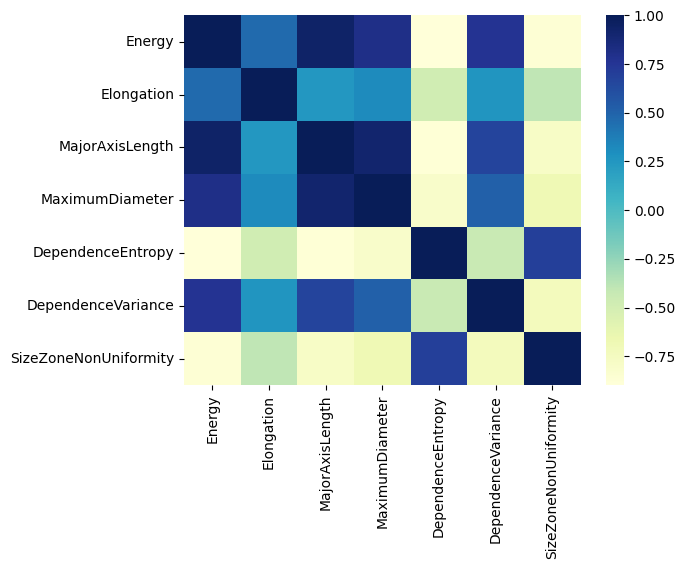

In [ ]:
# displaying pearson correlation heatmap of the remaining features after elimination
pearson_correlation_heatmap(processed_df3)

In [ ]:
# grid_search(processed_df2) # this step is skipped, because the best parameters have been determined before by it

In [ ]:
# getting the evaluation metrics for validation and testing datasets
accuracy_scores_val, precision_macro_scores_val, f1_macro_scores_val, accuracy_scores_test, precision_macro_scores_test, f1_macro_scores_test = estimators_training_evaluation(processed_df3)

## Validation Metrics ##

LogisticRegression
		>> accuracy: 66.3939%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


		>> precision_macro: 68.4197%
		>> f1_macro: 58.9423%

DecisionTreeClassifier
		>> accuracy: 69.9464%
		>> precision_macro: 75.9698%
		>> f1_macro: 69.0696%

RandomForestClassifier
		>> accuracy: 70.8618%
		>> precision_macro: 80.6320%
		>> f1_macro: 68.7269%

KNeighborsClassifier
		>> accuracy: 68.2005%
		>> precision_macro: 68.6233%
		>> f1_macro: 68.2031%

SVC
		>> accuracy: 70.6544%
		>> precision_macro: 82.0589%
		>> f1_macro: 67.8174%


## Testing Metrics ##

LogisticRegression
		>> accuracy metric: 66.5527%
		>> precisio metric: 68.7799%
		>> f1 metric: 58.8128%

DecisionTreeClassifier
		>> accuracy metric: 69.7754%
		>> precisio metric: 74.6253%
		>> f1 metric: 69.6231%

RandomForestClassifier
		>> accuracy metric: 70.8984%
		>> precisio metric: 81.3924%
		>> f1 metric: 68.5665%

KNeighborsClassifier
		>> accuracy metric: 66.4551%
		>> precisio metric: 66.8727%
		>> f1 metric: 66.4474%

SVC
		>> accuracy metric: 70.0684%
		>> precisio metric: 81.2789%
		>> f1 metric: 66.6856%


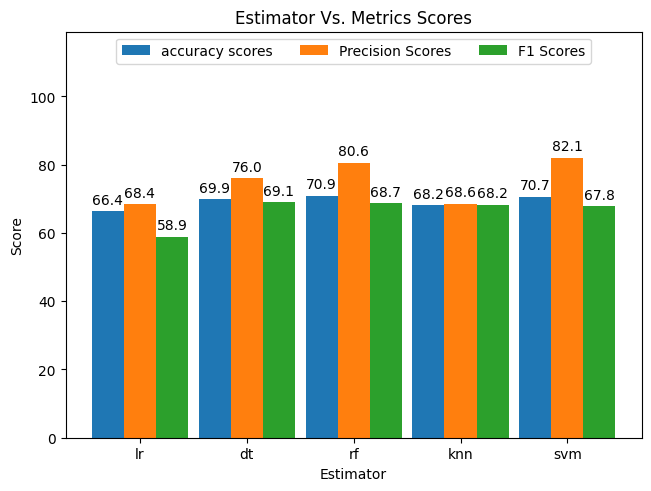

<Figure size 640x480 with 0 Axes>

In [ ]:
# displaying the evaluation metrics for the validation dataset
estimators_performance_plot(accuracy_scores_val, precision_macro_scores_val, f1_macro_scores_val, save_fig=True)

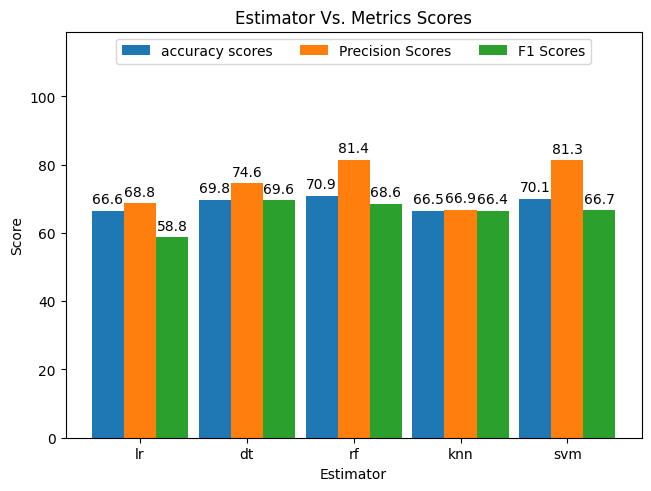

<Figure size 640x480 with 0 Axes>

In [ ]:
# displaying the evaluation metrics for the testing dataset
estimators_performance_plot(accuracy_scores_test, precision_macro_scores_test, f1_macro_scores_test, save_fig=True)

In [ ]:
# Thanks for reaching here